In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import preprocessing
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split

In [2]:
#Set parameters to see all data
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Load Train dataset
train_60 = pd.read_csv("../data/201124_Cycles/data_60sec_no_overlap/trainData.csv", delimiter = ";")
train_120 = pd.read_csv("../data/201124_Cycles/data_120sec_no_overlap/trainData.csv", delimiter = ";")

In [4]:
train_60.head().append(train_60.tail())

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,0.746557,5.543296,0.000,1.498622,1.251712,-0.625856,0.407790,0.254198,0.764438,-0.342731,0.166667,0.050000,0.766667,1,46.0,1.000000,0
1,1,3.223903,10.237216,0.000,2.865706,2.503424,-2.056384,0.541438,0.610606,1.107081,-0.948944,0.283333,0.366667,0.200000,1,12.0,1.200000,3
2,1,5.926260,11.265408,0.000,3.520962,2.101088,-1.385824,0.511081,0.299588,0.553941,-0.445177,0.383333,0.400000,0.050000,1,3.0,1.583333,5
3,1,6.596820,11.801856,0.000,3.590125,2.682240,-2.637536,0.806090,0.616442,0.938784,-0.931076,0.366667,0.483333,0.033333,2,1.0,1.766667,9
4,1,3.960774,10.013696,0.000,3.855763,2.235200,-1.117600,0.671483,0.333223,0.750557,-0.455555,0.316667,0.350000,0.250000,2,7.5,1.366667,2
117,12,14.583935,23.263889,0.000,7.045107,2.777778,-2.602778,0.687488,0.710455,1.017816,-0.848077,0.483333,0.433333,0.083333,1,5.0,2.866667,7
118,12,10.135231,19.433333,0.000,6.525464,2.877778,-1.736111,0.687375,0.501192,0.889667,-0.826923,0.416667,0.433333,0.083333,1,5.0,2.150000,6
119,12,5.154074,12.700000,0.000,4.095980,2.408333,-2.711111,0.738142,0.838381,1.048148,-1.295139,0.400000,0.400000,0.083333,1,5.0,1.533333,7
120,12,17.044074,27.766667,2.325,7.529378,1.933333,-1.377778,0.515177,0.401838,0.919603,-0.666204,0.583333,0.300000,0.000000,0,0.0,3.266667,7
121,12,14.301481,25.516667,0.000,8.033258,2.491667,-1.961111,0.776762,0.578490,0.864259,-0.896953,0.250000,0.516667,0.083333,1,5.0,2.816667,6


In [5]:
train_60.shape

(122, 18)

In [6]:
train_60.dtypes

Cycle            int64
meanVel        float64
maxVel         float64
minVel         float64
stdVel         float64
maxAccel       float64
maxDecel       float64
stdAccel       float64
stdDecel       float64
meanAccel      float64
meanDecel      float64
rAccel         float64
rDecel         float64
rStop          float64
stopCnt          int64
meanStopDur    float64
meanGear       float64
gearChg          int64
dtype: object

In [7]:
train_120_with_overlap = pd.read_csv("../data/201127_Cycles/data_120sec_overlap_10parts/trainData.csv", delimiter = ";")
train_120_with_overlap.head().append(train_120_with_overlap.tail())

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
0,1,2.982662,11.265408,0.000000,3.353058,2.503424,-2.056384,0.551675,0.537419,0.795549,-0.672639,0.293413,0.257485,0.365269,3,20.333333,1.208333,9
1,1,4.731439,11.801856,0.000000,3.491776,2.682240,-2.056384,0.662050,0.517045,0.903766,-0.707813,0.359281,0.395210,0.095808,3,5.333333,1.416667,15
2,1,5.179278,11.801856,0.000000,3.661630,2.682240,-2.637536,0.674858,0.543487,0.801692,-0.702197,0.359281,0.389222,0.113772,4,4.750000,1.511905,16
3,1,5.757769,11.801856,0.000000,3.780986,2.682240,-2.637536,0.678193,0.531246,0.779436,-0.676477,0.371257,0.407186,0.119760,4,5.000000,1.619048,16
4,1,4.185146,11.801856,0.000000,3.852165,2.682240,-2.637536,0.685856,0.526178,0.817918,-0.711006,0.323353,0.377246,0.239521,5,8.000000,1.398810,12
115,12,31.716200,37.347222,23.177778,3.137992,1.497222,-0.844444,0.366898,0.234508,0.474109,-0.378851,0.389706,0.323529,0.000000,0,0.000000,4.978102,1
116,12,32.070316,37.347222,27.066667,2.752313,0.900000,-0.844444,0.223736,0.216544,0.358503,-0.328252,0.360294,0.301471,0.000000,0,0.000000,5.000000,0
117,12,32.773459,37.347222,27.066667,2.585614,0.900000,-0.844444,0.217064,0.224579,0.396010,-0.347762,0.404412,0.264706,0.000000,0,0.000000,5.000000,0
118,12,33.021269,37.347222,24.275000,2.471050,0.900000,-1.400000,0.209060,0.306952,0.383044,-0.490033,0.352941,0.375000,0.000000,0,0.000000,4.992701,0
119,12,30.554846,37.347222,1.594444,7.809445,0.794444,-1.750000,0.186108,0.492204,0.365447,-0.702861,0.301471,0.492647,0.000000,0,0.000000,4.693431,4


In [8]:
train_60.shape

(122, 18)

In [10]:
train_60.dtypes

Cycle            int64
meanVel        float64
maxVel         float64
minVel         float64
stdVel         float64
maxAccel       float64
maxDecel       float64
stdAccel       float64
stdDecel       float64
meanAccel      float64
meanDecel      float64
rAccel         float64
rDecel         float64
rStop          float64
stopCnt          int64
meanStopDur    float64
meanGear       float64
gearChg          int64
dtype: object

In [11]:
train_60.meanVel.min(), train_60.meanVel.max()

(0.7465568, 35.37916667)

In [12]:
corr = train_60.corr()
corr

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg
Cycle,1.000000,0.219500,0.343401,0.092374,0.284223,0.127737,-0.071054,0.115967,0.122775,0.134015,-0.215829,0.122701,0.027550,-0.189047,-0.039231,-0.181037,0.234154,0.158562
meanVel,0.219500,1.000000,0.964607,0.934394,-0.397829,-0.655954,0.386203,-0.673590,-0.471201,-0.680839,0.566593,-0.011504,-0.083974,-0.651939,-0.684021,-0.597960,0.989160,-0.496948
maxVel,0.343401,0.964607,1.000000,0.840222,-0.182902,-0.507153,0.253408,-0.529389,-0.330663,-0.531305,0.418147,0.084438,-0.017750,-0.640607,-0.637120,-0.581361,0.954305,-0.363030
minVel,0.092374,0.934394,0.840222,1.000000,-0.668037,-0.770136,0.533732,-0.783061,-0.597147,-0.762456,0.656545,-0.143174,-0.203695,-0.508611,-0.624640,-0.474155,0.918199,-0.635264
stdVel,0.284223,-0.397829,-0.182902,-0.668037,1.000000,0.722403,-0.601067,0.718142,0.631303,0.646465,-0.611979,0.373429,0.267070,0.103108,0.313413,0.120783,-0.384419,0.622656
maxAccel,0.127737,-0.655954,-0.507153,-0.770136,0.722403,1.000000,-0.583162,0.973431,0.639274,0.902146,-0.699392,0.275987,0.259499,0.336349,0.591376,0.298978,-0.654260,0.679188
maxDecel,-0.071054,0.386203,0.253408,0.533732,-0.601067,-0.583162,1.000000,-0.588274,-0.966836,-0.658247,0.851472,-0.112627,-0.545923,-0.078687,-0.327971,-0.042194,0.391898,-0.677800
stdAccel,0.115967,-0.673590,-0.529389,-0.783061,0.718142,0.973431,-0.588274,1.000000,0.644594,0.911079,-0.703744,0.197914,0.301109,0.355812,0.591881,0.311559,-0.670680,0.683315
stdDecel,0.122775,-0.471201,-0.330663,-0.597147,0.631303,0.639274,-0.966836,0.644594,1.000000,0.711741,-0.905184,0.117493,0.418948,0.220922,0.386587,0.189721,-0.477336,0.674462
meanAccel,0.134015,-0.680839,-0.531305,-0.762456,0.646465,0.902146,-0.658247,0.911079,0.711741,1.000000,-0.813100,0.167590,0.302664,0.413727,0.556953,0.359729,-0.679488,0.739025


In [13]:
cr = corr.copy()
top_corr_columns = []
#Determine best correlate columns over 0.1
top_corr_columns = cr.loc[:, 'Cycle'][:-1]
best_accurate_columns = top_corr_columns[abs(top_corr_columns) > 0.1].sort_values(ascending=False)
best_accurate_columns

Cycle          1.000000
maxVel         0.343401
stdVel         0.284223
meanGear       0.234154
meanVel        0.219500
meanAccel      0.134015
maxAccel       0.127737
stdDecel       0.122775
rAccel         0.122701
stdAccel       0.115967
meanStopDur   -0.181037
rStop         -0.189047
meanDecel     -0.215829
Name: Cycle, dtype: float64

In [14]:
bins_methods = [ "auto", "fd", "doane", "scott", "stone", "rice", "sturges", "sqrt"]

In [15]:
# https://stackoverflow.com/a/18364570
def get_columns_bins(column_name):
    all_bins = []

    for method in bins_methods:
        start = datetime.now()
        hist, bin_edges = np.histogram(column_name,bins=method)
        all_bins.append(bin_edges)
        print("Method : {:<7} - Running Time : {:<5} - Number of bins : {:<5} - Head : {} - Tail : {}".format(method,str(datetime.now()-start), len(bin_edges), bin_edges[:3], bin_edges[-3:-1]))
    return all_bins

In [16]:
# https://stackoverflow.com/a/18364570
def get_clustering_bins(s, quantile=0.3, n_samples=None):
    
    series = s.dropna().values.reshape(-1, 1)
    
    bandwidth = estimate_bandwidth(series, quantile=quantile, n_samples=n_samples)
    clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(series)

    d = pd.DataFrame(columns=['data_column', 'label_column'])

    d['data_column'] = series.reshape(-1)
    d['label_column'] = clustering.labels_
    
    sorted_vals = d.groupby('label_column')['data_column'].max().sort_values().values
    bins = np.insert(sorted_vals, [0] , [series.min()-1])
    bins[-1] = bins[-1] + 1
    
    return bins, range(bins.size-1)

#Apply bins to age column

In [17]:
train_60.columns

Index(['Cycle', 'meanVel', 'maxVel', 'minVel', 'stdVel', 'maxAccel', 'maxDecel', 'stdAccel', 'stdDecel', 'meanAccel', 'meanDecel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg'], dtype='object')

In [18]:
train_60.meanVel.min()

0.7465568

In [19]:
def determine_bins(df, col):
    all_bins_col = []
    all_bins_col = get_columns_bins(df[col])
    
    _bin,label = get_clustering_bins(pd.Series(all_bins_col[0]))
    df.hist(bins=_bin)
    _bin
    
    len(_bin) , df[col].value_counts(bins=_bin)
    
    str1 = col
    str2 = "_category"
    col_name = str1 + str2
    
    df[col_name] = pd.cut(df[col], _bin).cat.codes
    df.head(5).append(df.tail(5))
    return df

In [22]:
train_60.columns

Index(['Cycle', 'meanVel', 'maxVel', 'minVel', 'stdVel', 'maxAccel', 'maxDecel', 'stdAccel', 'stdDecel', 'meanAccel', 'meanDecel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg', 'Cycle_category', 'meanVel_category', 'maxVel_category', 'minVel_category', 'stdVel_category', 'maxAccel_category', 'maxDecel_category', 'stdAccel_category'], dtype='object')

In [33]:
train_60_columns = ['meanVel', 'maxVel', 'minVel', 'maxAccel', 'maxDecel', 'stdAccel', 'meanAccel', 'rAccel', 'rDecel', 'rStop', 'stopCnt', 'meanStopDur', 'meanGear', 'gearChg', 'Cycle_category', 'meanVel_category', 'maxVel_category', 'minVel_category', 'stdVel_category', 'maxAccel_category', 'maxDecel_category', 'stdAccel_category']


In [34]:
train_60.stdDecel.unique()

array([0.2541977 , 0.61060646, 0.29958762, 0.61644171, 0.33322298,
       0.36498982, 0.15253734, 0.37954547, 0.77576944, 0.29931802,
       0.44014865, 0.46714442, 0.20592664, 0.37291208, 0.19077873,
       0.20628278, 0.51479353, 0.35820509, 0.4372704 , 0.37955434,
       1.11574691, 0.13814616, 0.7596927 , 0.14897983, 0.17432545,
       0.11702986, 0.51143415, 0.51662582, 0.1171214 , 0.14782799,
       0.64030496, 0.3964764 , 0.14522581, 0.16330382, 0.71608687,
       0.73404135, 0.08471084, 0.38327363, 0.51796122, 0.45626638,
       0.10001403, 0.37879931, 0.7525817 , 0.43728508, 0.29561665,
       0.0468916 , 0.24496351, 0.08924629, 0.05613128, 0.57616108,
       0.19887289, 0.78674585, 0.26205503, 0.08444821, 0.08272726,
       0.21423048, 0.216963  , 0.5604668 , 0.69987878, 0.02580987,
       0.022352  , 0.33110289, 0.11751504, 0.1915486 , 0.        ,
       0.03650066,        nan, 0.04591571, 0.28145098, 0.05674259,
       0.41007556, 0.43790984, 0.50282637, 0.10741197, 0.39148

meanVel
Method : auto    - Running Time : 0:00:00.000803 - Number of bins : 9     - Head : [0.7465568  5.07563303 9.40470927] - Tail : [26.7210142  31.05009044]
Method : fd      - Running Time : 0:00:00.000537 - Number of bins : 7     - Head : [ 0.7465568   6.51865844 12.29076009] - Tail : [23.83496338 29.60706502]
Method : doane   - Running Time : 0:00:00.000435 - Number of bins : 11    - Head : [0.7465568  4.20981779 7.67307877] - Tail : [28.4526447  31.91590568]
Method : scott   - Running Time : 0:00:00.000369 - Number of bins : 6     - Head : [ 0.7465568   7.67307877 14.59960075] - Tail : [21.52612272 28.4526447 ]
Method : stone   - Running Time : 0:00:00.019405 - Number of bins : 4     - Head : [ 0.7465568  12.29076009 23.83496338] - Tail : [12.29076009 23.83496338]
Method : rice    - Running Time : 0:00:00.000485 - Number of bins : 11    - Head : [0.7465568  4.20981779 7.67307877] - Tail : [28.4526447  31.91590568]
Method : sturges - Running Time : 0:00:00.000314 - Number of bins

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=4.329076, using data points as seeds.
  " using data points as seeds." % bin_size)


maxVel
Method : auto    - Running Time : 0:00:00.000654 - Number of bins : 9     - Head : [ 5.543296    9.42677289 13.31024978] - Tail : [28.84415733 32.72763422]
Method : fd      - Running Time : 0:00:00.000390 - Number of bins : 7     - Head : [ 5.543296   10.72126519 15.89923437] - Tail : [26.25517274 31.43314193]
Method : doane   - Running Time : 0:00:00.000360 - Number of bins : 11    - Head : [ 5.543296    8.65007751 11.75685902] - Tail : [30.39754809 33.5043296 ]
Method : scott   - Running Time : 0:00:00.000347 - Number of bins : 7     - Head : [ 5.543296   10.72126519 15.89923437] - Tail : [26.25517274 31.43314193]
Method : stone   - Running Time : 0:00:00.013585 - Number of bins : 8     - Head : [ 5.543296   9.9815553 14.4198146] - Tail : [27.73459251 32.17285181]
Method : rice    - Running Time : 0:00:00.000318 - Number of bins : 11    - Head : [ 5.543296    8.65007751 11.75685902] - Tail : [30.39754809 33.5043296 ]
Method : sturges - Running Time : 0:00:00.000271 - Number of

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=3.883477, using data points as seeds.
  " using data points as seeds." % bin_size)


minVel
Method : auto    - Running Time : 0:00:00.000762 - Number of bins : 9     - Head : [0.         4.35069445 8.70138889] - Tail : [26.10416667 30.45486111]
Method : fd      - Running Time : 0:00:00.000512 - Number of bins : 6     - Head : [ 0.          6.96111111 13.92222222] - Tail : [20.88333334 27.84444445]
Method : doane   - Running Time : 0:00:00.000455 - Number of bins : 12    - Head : [0.         3.16414141 6.32828283] - Tail : [28.47727273 31.64141415]
Method : scott   - Running Time : 0:00:00.000348 - Number of bins : 6     - Head : [ 0.          6.96111111 13.92222222] - Tail : [20.88333334 27.84444445]
Method : stone   - Running Time : 0:00:00.018394 - Number of bins : 101   - Head : [0.         0.34805556 0.69611111] - Tail : [34.10944445 34.4575    ]
Method : rice    - Running Time : 0:00:00.000342 - Number of bins : 11    - Head : [0.         3.48055556 6.96111111] - Tail : [27.84444445 31.325     ]
Method : sturges - Running Time : 0:00:00.000415 - Number of bins : 9

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=4.350694, using data points as seeds.
  " using data points as seeds." % bin_size)


maxAccel
Method : auto    - Running Time : 0:00:00.001029 - Number of bins : 9     - Head : [0.134112 0.58674  1.039368] - Tail : [2.84988  3.302508]
Method : fd      - Running Time : 0:00:00.000503 - Number of bins : 9     - Head : [0.134112 0.58674  1.039368] - Tail : [2.84988  3.302508]
Method : doane   - Running Time : 0:00:00.000390 - Number of bins : 11    - Head : [0.134112  0.4962144 0.8583168] - Tail : [3.0309312 3.3930336]
Method : scott   - Running Time : 0:00:00.000388 - Number of bins : 8     - Head : [0.134112   0.65140114 1.16869029] - Tail : [2.72055771 3.23784686]
Method : stone   - Running Time : 0:00:00.014540 - Number of bins : 4     - Head : [0.134112 1.34112  2.548128] - Tail : [1.34112  2.548128]
Method : rice    - Running Time : 0:00:00.000277 - Number of bins : 11    - Head : [0.134112  0.4962144 0.8583168] - Tail : [3.0309312 3.3930336]
Method : sturges - Running Time : 0:00:00.000255 - Number of bins : 9     - Head : [0.134112 0.58674  1.039368] - Tail : [2.8

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.452628, using data points as seeds.
  " using data points as seeds." % bin_size)


maxDecel
Method : auto    - Running Time : 0:00:00.000823 - Number of bins : 9     - Head : [-4.08333333 -3.57291667 -3.0625    ] - Tail : [-1.02083333 -0.51041667]
Method : fd      - Running Time : 0:00:00.000623 - Number of bins : 9     - Head : [-4.08333333 -3.57291667 -3.0625    ] - Tail : [-1.02083333 -0.51041667]
Method : doane   - Running Time : 0:00:00.000588 - Number of bins : 11    - Head : [-4.08333333 -3.675      -3.26666667] - Tail : [-0.81666667 -0.40833333]
Method : scott   - Running Time : 0:00:00.000388 - Number of bins : 8     - Head : [-4.08333333 -3.5        -2.91666667] - Tail : [-1.16666667 -0.58333333]
Method : stone   - Running Time : 0:00:00.020173 - Number of bins : 96    - Head : [-4.08333333 -4.04035088 -3.99736842] - Tail : [-0.08596491 -0.04298246]
Method : rice    - Running Time : 0:00:00.000506 - Number of bins : 11    - Head : [-4.08333333 -3.675      -3.26666667] - Tail : [-0.81666667 -0.40833333]
Method : sturges - Running Time : 0:00:00.000442 - Numb

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.510417, using data points as seeds.
  " using data points as seeds." % bin_size)


stdAccel
Method : auto    - Running Time : 0:00:00.002023 - Number of bins : 9     - Head : [0.         0.12557583 0.25115167] - Tail : [0.753455   0.87903083]
Method : fd      - Running Time : 0:00:00.001041 - Number of bins : 9     - Head : [0.         0.12557583 0.25115167] - Tail : [0.753455   0.87903083]
Method : doane   - Running Time : 0:00:00.000503 - Number of bins : 11    - Head : [0.         0.10046067 0.20092133] - Tail : [0.80368533 0.904146  ]
Method : scott   - Running Time : 0:00:00.000362 - Number of bins : 8     - Head : [0.         0.14351524 0.28703048] - Tail : [0.71757619 0.86109143]
Method : stone   - Running Time : 0:00:00.018742 - Number of bins : 6     - Head : [0.         0.20092133 0.40184267] - Tail : [0.602764   0.80368533]
Method : rice    - Running Time : 0:00:00.000331 - Number of bins : 11    - Head : [0.         0.10046067 0.20092133] - Tail : [0.80368533 0.904146  ]
Method : sturges - Running Time : 0:00:00.000300 - Number of bins : 9     - Head : [0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.125576, using data points as seeds.
  " using data points as seeds." % bin_size)


meanAccel
Method : auto    - Running Time : 0:00:00.000452 - Number of bins : 9     - Head : [0.12373737 0.3023262  0.48091503] - Tail : [1.19527034 1.37385917]
Method : fd      - Running Time : 0:00:00.000564 - Number of bins : 9     - Head : [0.12373737 0.3023262  0.48091503] - Tail : [1.19527034 1.37385917]
Method : doane   - Running Time : 0:00:00.000336 - Number of bins : 11    - Head : [0.12373737 0.26660844 0.4094795 ] - Tail : [1.26670587 1.40957694]
Method : scott   - Running Time : 0:00:00.000259 - Number of bins : 8     - Head : [0.12373737 0.32783889 0.53194041] - Tail : [1.14424496 1.34834648]
Method : stone   - Running Time : 0:00:00.015589 - Number of bins : 4     - Head : [0.12373737 0.59997425 1.07621112] - Tail : [0.59997425 1.07621112]
Method : rice    - Running Time : 0:00:00.000300 - Number of bins : 11    - Head : [0.12373737 0.26660844 0.4094795 ] - Tail : [1.26670587 1.40957694]
Method : sturges - Running Time : 0:00:00.000255 - Number of bins : 9     - Head : [

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.178589, using data points as seeds.
  " using data points as seeds." % bin_size)


rAccel
Method : auto    - Running Time : 0:00:00.000884 - Number of bins : 12    - Head : [0.01666667 0.0969697  0.17727273] - Tail : [0.73939394 0.81969697]
Method : fd      - Running Time : 0:00:00.000652 - Number of bins : 12    - Head : [0.01666667 0.0969697  0.17727273] - Tail : [0.73939394 0.81969697]
Method : doane   - Running Time : 0:00:00.000416 - Number of bins : 10    - Head : [0.01666667 0.11481482 0.21296296] - Tail : [0.7037037  0.80185185]
Method : scott   - Running Time : 0:00:00.000330 - Number of bins : 10    - Head : [0.01666667 0.11481482 0.21296296] - Tail : [0.7037037  0.80185185]
Method : stone   - Running Time : 0:00:00.017053 - Number of bins : 54    - Head : [0.01666667 0.03333333 0.05      ] - Tail : [0.86666667 0.88333333]
Method : rice    - Running Time : 0:00:00.000279 - Number of bins : 11    - Head : [0.01666667 0.105      0.19333333] - Tail : [0.72333333 0.81166667]
Method : sturges - Running Time : 0:00:00.000255 - Number of bins : 9     - Head : [0.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.079167, using data points as seeds.
  " using data points as seeds." % bin_size)


rStop
Method : auto    - Running Time : 0:00:00.001082 - Number of bins : 15    - Head : [0.         0.0547619  0.10952381] - Tail : [0.65714286 0.71190476]
Method : fd      - Running Time : 0:00:00.000539 - Number of bins : 15    - Head : [0.         0.0547619  0.10952381] - Tail : [0.65714286 0.71190476]
Method : doane   - Running Time : 0:00:00.000454 - Number of bins : 13    - Head : [0.         0.06388889 0.12777778] - Tail : [0.63888889 0.70277778]
Method : scott   - Running Time : 0:00:00.000343 - Number of bins : 8     - Head : [0.         0.10952381 0.21904762] - Tail : [0.54761905 0.65714286]
Method : stone   - Running Time : 0:00:00.019586 - Number of bins : 101   - Head : [0.         0.00766667 0.01533333] - Tail : [0.75133333 0.759     ]
Method : rice    - Running Time : 0:00:00.000333 - Number of bins : 11    - Head : [0.         0.07666667 0.15333333] - Tail : [0.61333333 0.69      ]
Method : sturges - Running Time : 0:00:00.000317 - Number of bins : 9     - Head : [0.  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


stopCnt
Method : auto    - Running Time : 0:00:00.000837 - Number of bins : 14    - Head : [0.         0.38461538 0.76923077] - Tail : [4.23076923 4.61538462]
Method : fd      - Running Time : 0:00:00.000723 - Number of bins : 14    - Head : [0.         0.38461538 0.76923077] - Tail : [4.23076923 4.61538462]
Method : doane   - Running Time : 0:00:00.000509 - Number of bins : 13    - Head : [0.         0.41666667 0.83333333] - Tail : [4.16666667 4.58333333]
Method : scott   - Running Time : 0:00:00.000422 - Number of bins : 10    - Head : [0.         0.55555556 1.11111111] - Tail : [3.88888889 4.44444444]
Method : stone   - Running Time : 0:00:00.022814 - Number of bins : 101   - Head : [0.   0.05 0.1 ] - Tail : [4.9  4.95]
Method : rice    - Running Time : 0:00:00.000349 - Number of bins : 11    - Head : [0.  0.5 1. ] - Tail : [4.  4.5]
Method : sturges - Running Time : 0:00:00.000356 - Number of bins : 9     - Head : [0.    0.625 1.25 ] - Tail : [3.75  4.375]
Method : sqrt    - Runnin

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


meanStopDur
Method : auto    - Running Time : 0:00:00.000826 - Number of bins : 23    - Head : [0.         2.09090909 4.18181818] - Tail : [41.81818182 43.90909091]
Method : fd      - Running Time : 0:00:00.000509 - Number of bins : 23    - Head : [0.         2.09090909 4.18181818] - Tail : [41.81818182 43.90909091]
Method : doane   - Running Time : 0:00:00.000421 - Number of bins : 13    - Head : [0.         3.83333333 7.66666667] - Tail : [38.33333333 42.16666667]
Method : scott   - Running Time : 0:00:00.000352 - Number of bins : 8     - Head : [ 0.          6.57142857 13.14285714] - Tail : [32.85714286 39.42857143]
Method : stone   - Running Time : 0:00:00.020478 - Number of bins : 101   - Head : [0.   0.46 0.92] - Tail : [45.08 45.54]
Method : rice    - Running Time : 0:00:00.000610 - Number of bins : 11    - Head : [0.  4.6 9.2] - Tail : [36.8 41.4]
Method : sturges - Running Time : 0:00:00.000881 - Number of bins : 9     - Head : [ 0.    5.75 11.5 ] - Tail : [34.5  40.25]
Method

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


meanGear
Method : auto    - Running Time : 0:00:00.000821 - Number of bins : 9     - Head : [1.  1.5 2. ] - Tail : [4.  4.5]
Method : fd      - Running Time : 0:00:00.000685 - Number of bins : 6     - Head : [1.  1.8 2.6] - Tail : [3.4 4.2]
Method : doane   - Running Time : 0:00:00.000653 - Number of bins : 11    - Head : [1.  1.4 1.8] - Tail : [4.2 4.6]
Method : scott   - Running Time : 0:00:00.000408 - Number of bins : 6     - Head : [1.  1.8 2.6] - Tail : [3.4 4.2]
Method : stone   - Running Time : 0:00:00.019543 - Number of bins : 75    - Head : [1.         1.05405405 1.10810811] - Tail : [4.89189189 4.94594595]
Method : rice    - Running Time : 0:00:00.000368 - Number of bins : 11    - Head : [1.  1.4 1.8] - Tail : [4.2 4.6]
Method : sturges - Running Time : 0:00:00.000824 - Number of bins : 9     - Head : [1.  1.5 2. ] - Tail : [4.  4.5]
Method : sqrt    - Running Time : 0:00:00.000708 - Number of bins : 13    - Head : [1.         1.33333333 1.66666667] - Tail : [4.33333333 4.666

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.500000, using data points as seeds.
  " using data points as seeds." % bin_size)


gearChg
Method : auto    - Running Time : 0:00:00.000516 - Number of bins : 9     - Head : [0.    1.625 3.25 ] - Tail : [ 9.75  11.375]
Method : fd      - Running Time : 0:00:00.000468 - Number of bins : 8     - Head : [0.         1.85714286 3.71428571] - Tail : [ 9.28571429 11.14285714]
Method : doane   - Running Time : 0:00:00.000466 - Number of bins : 12    - Head : [0.         1.18181818 2.36363636] - Tail : [10.63636364 11.81818182]
Method : scott   - Running Time : 0:00:00.000343 - Number of bins : 8     - Head : [0.         1.85714286 3.71428571] - Tail : [ 9.28571429 11.14285714]
Method : stone   - Running Time : 0:00:00.019277 - Number of bins : 101   - Head : [0.   0.13 0.26] - Tail : [12.74 12.87]
Method : rice    - Running Time : 0:00:00.000293 - Number of bins : 11    - Head : [0.  1.3 2.6] - Tail : [10.4 11.7]
Method : sturges - Running Time : 0:00:00.000258 - Number of bins : 9     - Head : [0.    1.625 3.25 ] - Tail : [ 9.75  11.375]
Method : sqrt    - Running Time : 0:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=1.625000, using data points as seeds.
  " using data points as seeds." % bin_size)


Cycle_category
Method : auto    - Running Time : 0:00:00.000472 - Number of bins : 9     - Head : [0.    0.375 0.75 ] - Tail : [2.25  2.625]
Method : fd      - Running Time : 0:00:00.000371 - Number of bins : 5     - Head : [0.   0.75 1.5 ] - Tail : [1.5  2.25]
Method : doane   - Running Time : 0:00:00.000419 - Number of bins : 10    - Head : [0.         0.33333333 0.66666667] - Tail : [2.33333333 2.66666667]
Method : scott   - Running Time : 0:00:00.000296 - Number of bins : 6     - Head : [0.  0.6 1.2] - Tail : [1.8 2.4]
Method : stone   - Running Time : 0:00:00.016286 - Number of bins : 101   - Head : [0.   0.03 0.06] - Tail : [2.94 2.97]
Method : rice    - Running Time : 0:00:00.000301 - Number of bins : 11    - Head : [0.  0.3 0.6] - Tail : [2.4 2.7]
Method : sturges - Running Time : 0:00:00.000286 - Number of bins : 9     - Head : [0.    0.375 0.75 ] - Tail : [2.25  2.625]
Method : sqrt    - Running Time : 0:00:00.000279 - Number of bins : 13    - Head : [0.   0.25 0.5 ] - Tail :

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.375000, using data points as seeds.
  " using data points as seeds." % bin_size)


meanVel_category
Method : auto    - Running Time : 0:00:00.000826 - Number of bins : 9     - Head : [0.   0.75 1.5 ] - Tail : [4.5  5.25]
Method : fd      - Running Time : 0:00:00.000622 - Number of bins : 6     - Head : [0.  1.2 2.4] - Tail : [3.6 4.8]
Method : doane   - Running Time : 0:00:00.000453 - Number of bins : 10    - Head : [0.         0.66666667 1.33333333] - Tail : [4.66666667 5.33333333]
Method : scott   - Running Time : 0:00:00.000353 - Number of bins : 7     - Head : [0. 1. 2.] - Tail : [4. 5.]
Method : stone   - Running Time : 0:00:00.018314 - Number of bins : 101   - Head : [0.   0.06 0.12] - Tail : [5.88 5.94]
Method : rice    - Running Time : 0:00:00.000327 - Number of bins : 11    - Head : [0.  0.6 1.2] - Tail : [4.8 5.4]
Method : sturges - Running Time : 0:00:00.000319 - Number of bins : 9     - Head : [0.   0.75 1.5 ] - Tail : [4.5  5.25]
Method : sqrt    - Running Time : 0:00:00.000271 - Number of bins : 13    - Head : [0.  0.5 1. ] - Tail : [5.  5.5]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.750000, using data points as seeds.
  " using data points as seeds." % bin_size)


maxVel_category
Method : auto    - Running Time : 0:00:00.000851 - Number of bins : 9     - Head : [0.    0.625 1.25 ] - Tail : [3.75  4.375]
Method : fd      - Running Time : 0:00:00.000646 - Number of bins : 6     - Head : [0. 1. 2.] - Tail : [3. 4.]
Method : doane   - Running Time : 0:00:00.000632 - Number of bins : 10    - Head : [0.         0.55555556 1.11111111] - Tail : [3.88888889 4.44444444]
Method : scott   - Running Time : 0:00:00.000427 - Number of bins : 6     - Head : [0. 1. 2.] - Tail : [3. 4.]
Method : stone   - Running Time : 0:00:00.021797 - Number of bins : 101   - Head : [0.   0.05 0.1 ] - Tail : [4.9  4.95]
Method : rice    - Running Time : 0:00:00.000394 - Number of bins : 11    - Head : [0.  0.5 1. ] - Tail : [4.  4.5]
Method : sturges - Running Time : 0:00:00.000337 - Number of bins : 9     - Head : [0.    0.625 1.25 ] - Tail : [3.75  4.375]
Method : sqrt    - Running Time : 0:00:00.000357 - Number of bins : 13    - Head : [0.         0.41666667 0.83333333] - Ta

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.625000, using data points as seeds.
  " using data points as seeds." % bin_size)


minVel_category
Method : auto    - Running Time : 0:00:00.000684 - Number of bins : 9     - Head : [0.  0.5 1. ] - Tail : [3.  3.5]
Method : fd      - Running Time : 0:00:00.000748 - Number of bins : 5     - Head : [0. 1. 2.] - Tail : [2. 3.]
Method : doane   - Running Time : 0:00:00.000520 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : scott   - Running Time : 0:00:00.000381 - Number of bins : 5     - Head : [0. 1. 2.] - Tail : [2. 3.]
Method : stone   - Running Time : 0:00:00.022374 - Number of bins : 101   - Head : [0.   0.04 0.08] - Tail : [3.92 3.96]
Method : rice    - Running Time : 0:00:00.000372 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : sturges - Running Time : 0:00:00.000333 - Number of bins : 9     - Head : [0.  0.5 1. ] - Tail : [3.  3.5]
Method : sqrt    - Running Time : 0:00:00.000341 - Number of bins : 13    - Head : [0.         0.33333333 0.66666667] - Tail : [3.33333333 3.66666667]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.500000, using data points as seeds.
  " using data points as seeds." % bin_size)


stdVel_category
Method : auto    - Running Time : 0:00:00.000843 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : fd      - Running Time : 0:00:00.001264 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : doane   - Running Time : 0:00:00.000821 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : scott   - Running Time : 0:00:00.001228 - Number of bins : 7     - Head : [0.         0.66666667 1.33333333] - Tail : [2.66666667 3.33333333]
Method : stone   - Running Time : 0:00:00.023298 - Number of bins : 101   - Head : [0.   0.04 0.08] - Tail : [3.92 3.96]
Method : rice    - Running Time : 0:00:00.000421 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : sturges - Running Time : 0:00:00.000827 - Number of bins : 9     - Head : [0.  0.5 1. ] - Tail : [3.  3.5]
Method : sqrt    - Running Time : 0:00:00.000534 - Number of bins : 13    - Head : [0.         0.33333333 0.66666667] - Tail : [3.33

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)


maxAccel_category
Method : auto    - Running Time : 0:00:00.001723 - Number of bins : 9     - Head : [0.    0.625 1.25 ] - Tail : [3.75  4.375]
Method : fd      - Running Time : 0:00:00.000562 - Number of bins : 8     - Head : [0.         0.71428571 1.42857143] - Tail : [3.57142857 4.28571429]
Method : doane   - Running Time : 0:00:00.000470 - Number of bins : 10    - Head : [0.         0.55555556 1.11111111] - Tail : [3.88888889 4.44444444]
Method : scott   - Running Time : 0:00:00.000450 - Number of bins : 8     - Head : [0.         0.71428571 1.42857143] - Tail : [3.57142857 4.28571429]
Method : stone   - Running Time : 0:00:00.020643 - Number of bins : 101   - Head : [0.   0.05 0.1 ] - Tail : [4.9  4.95]
Method : rice    - Running Time : 0:00:00.000384 - Number of bins : 11    - Head : [0.  0.5 1. ] - Tail : [4.  4.5]
Method : sturges - Running Time : 0:00:00.000646 - Number of bins : 9     - Head : [0.    0.625 1.25 ] - Tail : [3.75  4.375]
Method : sqrt    - Running Time : 0:00:0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.625000, using data points as seeds.
  " using data points as seeds." % bin_size)


maxDecel_category
Method : auto    - Running Time : 0:00:00.000670 - Number of bins : 9     - Head : [0.  0.5 1. ] - Tail : [3.  3.5]
Method : fd      - Running Time : 0:00:00.000588 - Number of bins : 6     - Head : [0.  0.8 1.6] - Tail : [2.4 3.2]
Method : doane   - Running Time : 0:00:00.000567 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : scott   - Running Time : 0:00:00.000380 - Number of bins : 6     - Head : [0.  0.8 1.6] - Tail : [2.4 3.2]
Method : stone   - Running Time : 0:00:00.021830 - Number of bins : 101   - Head : [0.   0.04 0.08] - Tail : [3.92 3.96]
Method : rice    - Running Time : 0:00:00.000454 - Number of bins : 11    - Head : [0.  0.4 0.8] - Tail : [3.2 3.6]
Method : sturges - Running Time : 0:00:00.000480 - Number of bins : 9     - Head : [0.  0.5 1. ] - Tail : [3.  3.5]
Method : sqrt    - Running Time : 0:00:00.000341 - Number of bins : 13    - Head : [0.         0.33333333 0.66666667] - Tail : [3.33333333 3.66666667]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.500000, using data points as seeds.
  " using data points as seeds." % bin_size)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


stdAccel_category
Method : auto    - Running Time : 0:00:00.000626 - Number of bins : 9     - Head : [0.   0.75 1.5 ] - Tail : [4.5  5.25]
Method : fd      - Running Time : 0:00:00.000548 - Number of bins : 6     - Head : [0.  1.2 2.4] - Tail : [3.6 4.8]
Method : doane   - Running Time : 0:00:00.000491 - Number of bins : 10    - Head : [0.         0.66666667 1.33333333] - Tail : [4.66666667 5.33333333]
Method : scott   - Running Time : 0:00:00.000399 - Number of bins : 6     - Head : [0.  1.2 2.4] - Tail : [3.6 4.8]
Method : stone   - Running Time : 0:00:00.024569 - Number of bins : 101   - Head : [0.   0.06 0.12] - Tail : [5.88 5.94]
Method : rice    - Running Time : 0:00:00.000359 - Number of bins : 11    - Head : [0.  0.6 1.2] - Tail : [4.8 5.4]
Method : sturges - Running Time : 0:00:00.000545 - Number of bins : 9     - Head : [0.   0.75 1.5 ] - Tail : [4.5  5.25]
Method : sqrt    - Running Time : 0:00:00.000615 - Number of bins : 13    - Head : [0.  0.5 1. ] - Tail : [5.  5.5]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:795: RuntimeWarning: The number of bins estimated may be suboptimal.
  bin_edges, uniform_bins = _get_bin_edges(a, bins, range, weights)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cluster/_mean_shift.py:235: UserWarning: Binning data failed with provided bin_size=0.750000, using data points as seeds.
  " using data points as seeds." % bin_size)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


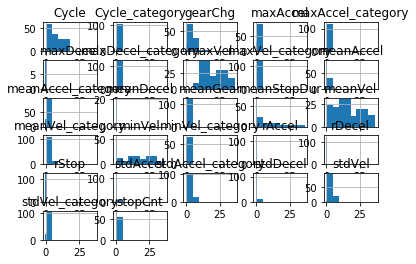

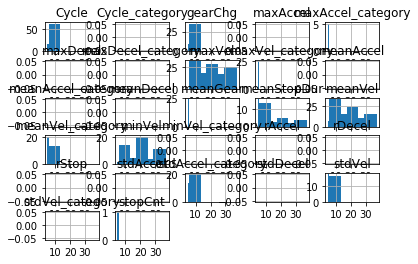

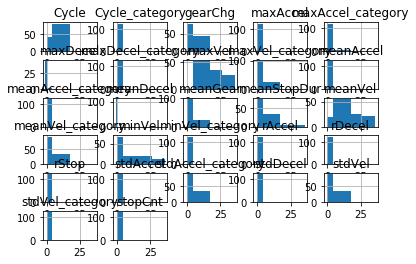

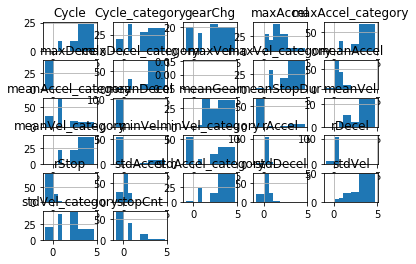

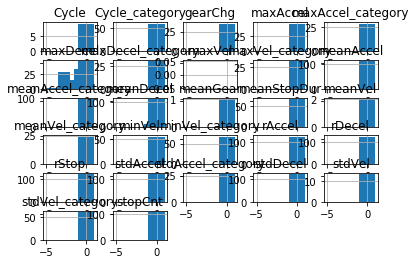

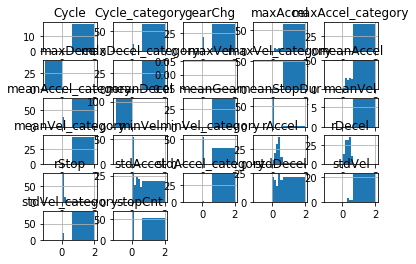

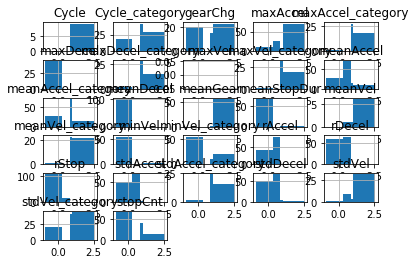

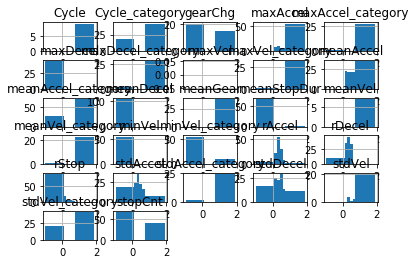

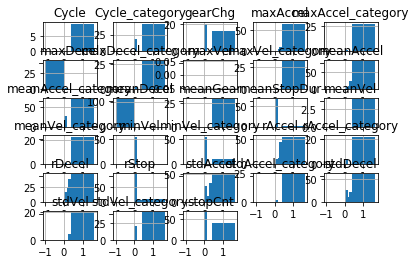

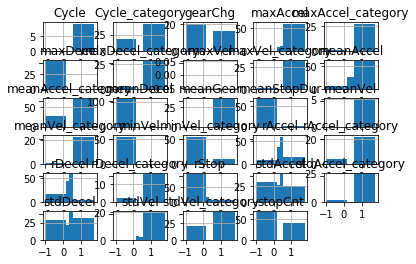

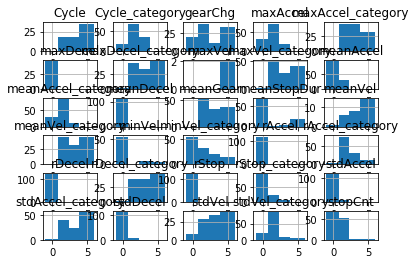

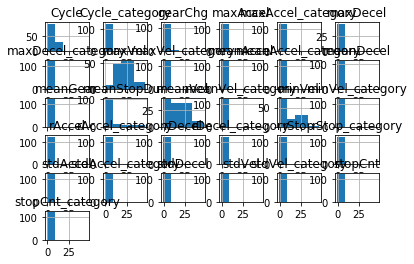

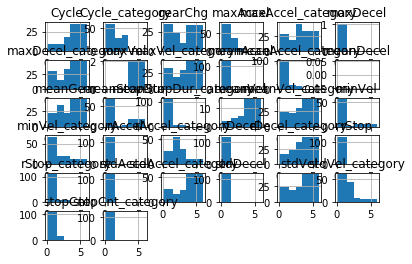

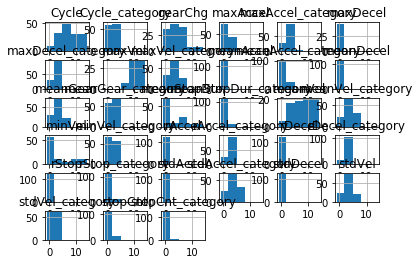

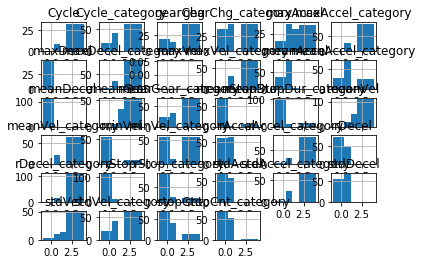

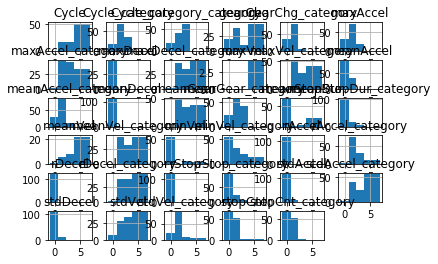

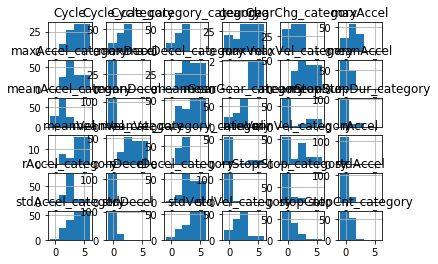

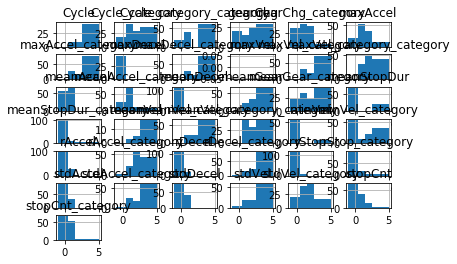

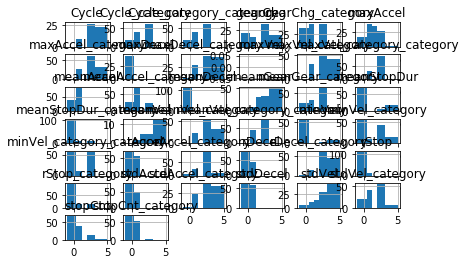

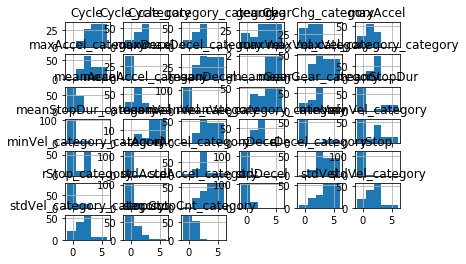

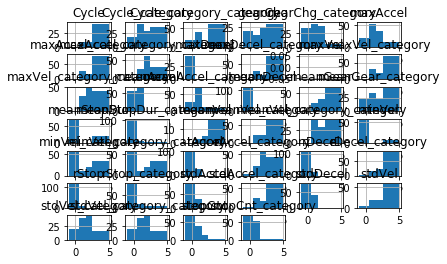

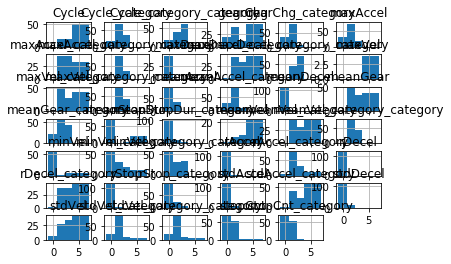

In [35]:
for cols in train_60_columns:
    print(cols)
    train_60 = determine_bins(train_60, cols)

In [36]:
train_60.head()

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,meanAccel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category,Cycle_category_category,meanVel_category_category,maxVel_category_category,minVel_category_category,stdVel_category_category,maxAccel_category_category,maxDecel_category_category,stdAccel_category_category
0,1,0.746557,5.543296,0.0,1.498622,1.251712,-0.625856,0.407790,0.254198,0.764438,-0.342731,0.166667,0.050000,0.766667,1,46.0,1.000000,0,0,0,0,0,1,3,4,4,1,1,1,3,1,3,0,0,0,0,0,0,1,2,3,3
1,1,3.223903,10.237216,0.0,2.865706,2.503424,-2.056384,0.541438,0.610606,1.107081,-0.948944,0.283333,0.366667,0.200000,1,12.0,1.200000,3,0,1,1,0,1,4,1,5,3,2,3,1,1,1,0,1,0,1,1,0,1,3,1,3
2,1,5.926260,11.265408,0.0,3.520962,2.101088,-1.385824,0.511081,0.299588,0.553941,-0.445177,0.383333,0.400000,0.050000,1,3.0,1.583333,5,0,2,1,0,2,4,3,5,1,2,4,0,1,0,1,2,0,1,1,0,2,3,3,3
3,1,6.596820,11.801856,0.0,3.590125,2.682240,-2.637536,0.806090,0.616442,0.938784,-0.931076,0.366667,0.483333,0.033333,2,1.0,1.766667,9,0,2,1,0,2,4,1,6,2,2,4,0,1,0,1,3,0,1,1,0,2,3,1,3
4,1,3.960774,10.013696,0.0,3.855763,2.235200,-1.117600,0.671483,0.333223,0.750557,-0.455555,0.316667,0.350000,0.250000,2,7.5,1.366667,2,0,1,1,0,2,4,3,6,1,2,3,1,1,0,0,1,0,1,1,0,2,3,3,3


In [37]:
corr2 = train_60.corr()
corr2

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,meanAccel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category,Cycle_category_category,meanVel_category_category,maxVel_category_category,minVel_category_category,stdVel_category_category,maxAccel_category_category,maxDecel_category_category,stdAccel_category_category
Cycle,1.000000,0.219500,0.343401,0.092374,0.284223,0.127737,-0.071054,0.115967,0.122775,0.134015,-0.215829,0.122701,0.027550,-0.189047,-0.039231,-0.181037,0.234154,0.158562,0.956435,0.234719,0.340097,0.092179,0.247184,0.065127,-0.107604,0.083484,0.187758,0.079498,0.044584,-0.237445,-0.015714,-0.225226,0.241950,0.091590,0.870417,0.202441,0.355841,0.067874,0.247184,0.063511,-0.080982,-0.033441
meanVel,0.219500,1.000000,0.964607,0.934394,-0.397829,-0.655954,0.386203,-0.673590,-0.471201,-0.680839,0.566593,-0.011504,-0.083974,-0.651939,-0.684021,-0.597960,0.989160,-0.496948,0.187943,0.976817,0.937207,0.926954,-0.439273,-0.701427,0.384197,-0.731055,-0.567166,0.002433,-0.067521,-0.580699,-0.743848,-0.485696,0.930027,-0.539361,0.107857,0.920230,0.864690,0.898558,-0.439273,-0.653426,0.276571,-0.764616
maxVel,0.343401,0.964607,1.000000,0.840222,-0.182902,-0.507153,0.253408,-0.529389,-0.330663,-0.531305,0.418147,0.084438,-0.017750,-0.640607,-0.637120,-0.581361,0.954305,-0.363030,0.300042,0.942934,0.971295,0.831772,-0.235076,-0.566737,0.251849,-0.593179,-0.431401,0.092020,-0.003564,-0.588050,-0.681739,-0.493131,0.905283,-0.409115,0.188475,0.883965,0.908537,0.797232,-0.235076,-0.525483,0.156161,-0.649685
minVel,0.092374,0.934394,0.840222,1.000000,-0.668037,-0.770136,0.533732,-0.783061,-0.597147,-0.762456,0.656545,-0.143174,-0.203695,-0.508611,-0.624640,-0.474155,0.918199,-0.635264,0.066232,0.906268,0.809873,0.972569,-0.684755,-0.793633,0.522363,-0.822330,-0.650500,-0.131301,-0.189028,-0.418868,-0.711315,-0.344885,0.829224,-0.685777,0.038355,0.847511,0.725670,0.936744,-0.684755,-0.742286,0.407313,-0.831376
stdVel,0.284223,-0.397829,-0.182902,-0.668037,1.000000,0.722403,-0.601067,0.718142,0.631303,0.646465,-0.611979,0.373429,0.267070,0.103108,0.313413,0.120783,-0.384419,0.622656,0.273025,-0.373329,-0.172029,-0.648906,0.958236,0.673414,-0.579956,0.683590,0.576969,0.355000,0.273162,0.012432,0.410401,0.001041,-0.308642,0.660857,0.181592,-0.347241,-0.087802,-0.642915,0.958236,0.627727,-0.508956,0.619518
maxAccel,0.127737,-0.655954,-0.507153,-0.770136,0.722403,1.000000,-0.583162,0.973431,0.639274,0.902146,-0.699392,0.275987,0.259499,0.336349,0.591376,0.298978,-0.654260,0.679188,0.157870,-0.630870,-0.502605,-0.797605,0.734969,0.947325,-0.616064,0.952490,0.832779,0.257005,0.275847,0.220068,0.670301,0.132382,-0.601689,0.710221,0.128544,-0.648367,-0.453142,-0.812345,0.734969,0.905897,-0.554948,0.862062
maxDecel,-0.071054,0.386203,0.253408,0.533732,-0.601067,-0.583162,1.000000,-0.588274,-0.966836,-0.658247,0.851472,-0.112627,-0.545923,-0.078687,-0.327971,-0.042194,0.391898,-0.677800,-0.085582,0.368082,0.259145,0.507328,-0.553774,-0.552983,0.953966,-0.551649,-0.581107,-0.084543,-0.547530,0.013804,-0.340616,0.071833,0.320267,-0.671341,-0.031476,0.382131,0.233465,0.499331,-0.553774,-0.543266,0.881458,-0.518312
stdAccel,0.115967,-0.673590,-0.529389,-0.783061,0.718142,0.973431,-0.588274,1.000000,0.644594,0.911079,-0.703744,0.197914,0.301109,0.355812,0.591881,0.311559,-0.670680,0.683315,0.143824,-0.650333,-0.528732,-0.804355,0.730173,0.927230,-0.616257,0.970463,0.837338,0.183895,0.309245,0.239290,0.663133,0.147273,-0.608519,0.714384,0.112468,-0.666798,-0.480127,-0.816953,0.730173,0.889770,-0.558560,0.873314
stdDecel,0.122775,-0.471201,-0.330663,-0.597147,0.631303,0.639274,-0.966836,0.644594,1.000000,0.711741,-0.905184,0.117493,0.418948,0.220

In [38]:
cr2 = corr2.copy()
top_corr_columns2 = []
#Determine best correlate columns over 0.1
top_corr_columns2 = cr2.loc[:, 'Cycle'][:-1]
best_accurate_columns2 = top_corr_columns2[abs(top_corr_columns2) > 0.1].sort_values(ascending=False)
best_accurate_columns2

Cycle                        1.000000
Cycle_category               0.956435
Cycle_category_category      0.870417
maxVel_category_category     0.355841
maxVel                       0.343401
maxVel_category              0.340097
stdVel                       0.284223
stdVel_category              0.247184
stdVel_category_category     0.247184
meanGear_category            0.241950
meanVel_category             0.234719
meanGear                     0.234154
meanVel                      0.219500
meanVel_category_category    0.202441
meanAccel_category           0.187758
gearChg                      0.158562
meanAccel                    0.134015
maxAccel                     0.127737
stdDecel                     0.122775
rAccel                       0.122701
stdAccel                     0.115967
maxDecel_category           -0.107604
meanStopDur                 -0.181037
rStop                       -0.189047
meanDecel                   -0.215829
meanStopDur_category        -0.225226
rStop_catego

In [39]:
best_accurate_columns

Cycle          1.000000
maxVel         0.343401
stdVel         0.284223
meanGear       0.234154
meanVel        0.219500
meanAccel      0.134015
maxAccel       0.127737
stdDecel       0.122775
rAccel         0.122701
stdAccel       0.115967
meanStopDur   -0.181037
rStop         -0.189047
meanDecel     -0.215829
Name: Cycle, dtype: float64

In [42]:
train_60.head()

,Cycle,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,Cycle_category,meanVel_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,meanAccel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category,Cycle_category_category,meanVel_category_category,maxVel_category_category,minVel_category_category,stdVel_category_category,maxAccel_category_category,maxDecel_category_category,stdAccel_category_category
0,1,0.746557,5.543296,0.0,1.498622,1.251712,-0.625856,0.407790,0.254198,0.764438,-0.342731,0.166667,0.050000,0.766667,1,46.0,1.000000,0,0,0,0,0,1,3,4,4,1,1,1,3,1,3,0,0,0,0,0,0,1,2,3,3
1,1,3.223903,10.237216,0.0,2.865706,2.503424,-2.056384,0.541438,0.610606,1.107081,-0.948944,0.283333,0.366667,0.200000,1,12.0,1.200000,3,0,1,1,0,1,4,1,5,3,2,3,1,1,1,0,1,0,1,1,0,1,3,1,3
2,1,5.926260,11.265408,0.0,3.520962,2.101088,-1.385824,0.511081,0.299588,0.553941,-0.445177,0.383333,0.400000,0.050000,1,3.0,1.583333,5,0,2,1,0,2,4,3,5,1,2,4,0,1,0,1,2,0,1,1,0,2,3,3,3
3,1,6.596820,11.801856,0.0,3.590125,2.682240,-2.637536,0.806090,0.616442,0.938784,-0.931076,0.366667,0.483333,0.033333,2,1.0,1.766667,9,0,2,1,0,2,4,1,6,2,2,4,0,1,0,1,3,0,1,1,0,2,3,1,3
4,1,3.960774,10.013696,0.0,3.855763,2.235200,-1.117600,0.671483,0.333223,0.750557,-0.455555,0.316667,0.350000,0.250000,2,7.5,1.366667,2,0,1,1,0,2,4,3,6,1,2,3,1,1,0,0,1,0,1,1,0,2,3,3,3


In [41]:
train_60.shape

(122, 42)

In [43]:
X = train_60.iloc[:,1:42]
y = train_60.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [44]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [45]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}


In [46]:
gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 n_jobs = -1,
                                 refit=True)

In [47]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-12-06 22:35:28.978364
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [44]:
print(gsm.best_score_)

0.6675324675324675


In [45]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'manhattan',
 'weights': 'distance'}

In [46]:
print(gsm.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='manhattan', weights='distance')


In [47]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
[2 1 4 2 2 5 1 4 9 3 7 8]


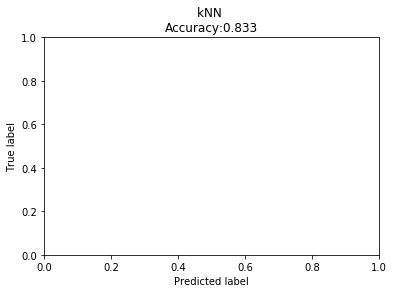

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.83        12
   macro avg       0.88      0.79      0.81        12
weighted avg       1.00      0.83      0.88        12

KNN for k =  3
[ 4  1  4  2  2 12  1  4  9  3  7  8]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


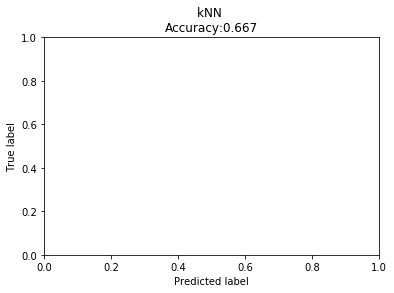

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0

    accuracy                           0.67        12
   macro avg       0.67      0.56      0.59        12
weighted avg       0.92      0.67      0.74        12

KNN for k =  5
[ 4  1  4  2  1 12  1  4  9  9  8  8]


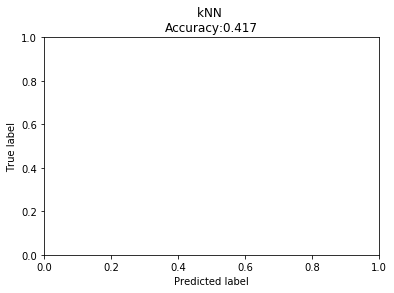

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         0

    accuracy                           0.42        12
   macro avg       0.30      0.37      0.29        12
weighted avg       0.44      0.42      0.37        12

KNN for k =  7
[4 1 4 2 1 5 1 4 9 8 8 8]


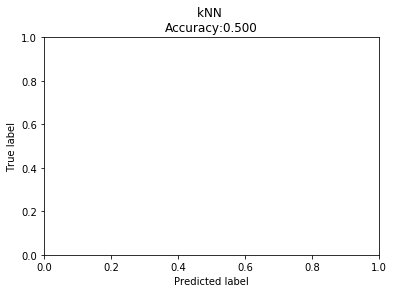

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         1

    accuracy                           0.50        12
   macro avg       0.50      0.54      0.47        12
weighted avg       0.56      0.50      0.47        12

KNN for k =  9
[4 1 4 2 1 5 1 4 9 8 8 8]


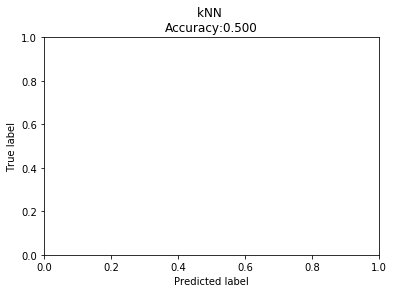

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         1

    accuracy                           0.50        12
   macro avg       0.50      0.54      0.47        12
weighted avg       0.56      0.50      0.47        12



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    phase_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(phase_predictor)

    cm = confusion_matrix(y_test, phase_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    print(classification_report(y_test, phase_predictor))

In [49]:
model = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [52]:
# save the model to disk
filename = '../models/KNC_model_120.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

[2 1 4 2 2 5 1 4 9 3 7 8]


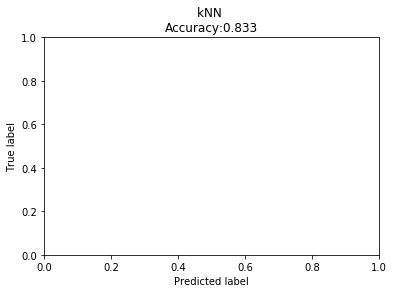

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           0.83        12
   macro avg       0.88      0.79      0.81        12
weighted avg       1.00      0.83      0.88        12



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
best_KNC_2 = loaded_model.fit(X_train, y_train)
phase_predictor_2 = best_KNC_2.predict(X_test)
print(phase_predictor_2)

cm = confusion_matrix(y_test, phase_predictor_2)
plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, phase_predictor_2)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(y_test, phase_predictor_2))

In [54]:
print(classification_report(y_test, phase_predictor))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.33      0.50         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         1
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         1

    accuracy                           0.50        12
   macro avg       0.50      0.54      0.47        12
weighted avg       0.56      0.50      0.47        12



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
y_test.head()

13    2
2     1
25    3
16    2
19    2
Name: Cycle, dtype: int64

In [56]:
phase_predictor

array([4, 1, 4, 2, 1, 5, 1, 4, 9, 8, 8, 8])

In [57]:
y_test['phase_prediction'] = phase_predictor

In [58]:
result = X_test

In [59]:
result

,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,meanVel_category,Cycle_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category,meanVel_category_category
13,8.933633,15.694444,0.527778,3.809309,1.555556,-1.500000,0.314912,0.354161,0.553184,-0.532552,0.493976,0.385542,0.000000,0,0.000000,2.107784,12,1,0,1,0,1,4,3,3,2,1,1,4,2,0,0,0,2,2,1
2,5.179278,11.801856,0.000000,3.661630,2.682240,-2.637536,0.674858,0.543487,0.801692,-0.702197,0.359281,0.389222,0.113772,4,4.750000,1.511905,16,0,0,1,0,1,5,2,5,3,2,1,3,2,1,2,0,1,3,0
25,12.282130,19.027778,0.000000,4.743684,1.916667,-1.916667,0.359013,0.457636,0.447957,-0.492571,0.402778,0.398148,0.023148,1,5.000000,2.571429,8,2,1,2,0,1,4,3,3,3,1,2,3,2,0,0,0,3,1,2
16,6.658184,13.833333,0.000000,3.445855,1.333333,-1.500000,0.385650,0.335209,0.602067,-0.436900,0.259036,0.487952,0.036145,1,6.000000,1.778443,9,1,0,1,0,1,3,3,4,2,1,2,2,3,0,0,0,1,1,1
19,2.239687,9.305556,0.000000,2.836479,1.611111,-1.472222,0.471797,0.452624,0.695437,-0.566138,0.168675,0.253012,0.512048,3,28.333333,1.149701,6,0,0,1,0,0,4,3,4,3,1,1,1,1,5,1,2,1,1,0
41,28.563437,36.416667,10.194444,6.927825,1.194444,-1.194444,0.270744,0.271016,0.413773,-0.316571,0.448598,0.271028,0.000000,0,0.000000,4.623256,4,5,1,5,2,2,3,3,3,2,1,2,4,2,0,0,0,5,1,3
5,2.231741,10.013696,0.000000,3.032285,2.235200,-2.637536,0.557787,0.534331,0.750557,-0.688053,0.227545,0.275449,0.461078,4,19.250000,1.154762,5,0,0,1,0,0,5,2,5,3,1,1,2,2,4,2,2,1,1,0
24,14.857399,22.305556,0.555556,4.958664,1.166667,-1.916667,0.309000,0.452427,0.359722,-0.483642,0.277778,0.416667,0.000000,0,0.000000,2.829493,11,3,1,3,0,1,3,3,3,3,1,2,2,2,0,0,0,3,2,2
82,9.261131,20.313889,0.000000,6.574728,2.877778,-2.697222,0.686781,0.672775,0.940909,-0.964021,0.398551,0.456522,0.072464,2,5.000000,2.057554,14,1,3,2,0,1,5,2,5,4,2,0,3,3,1,1,0,2,2,1
20,9.606631,19.750000,0.000000,5.716543,2.361111,-4.083333,0.514364,0.690335,0.686243,-0.711948,0.486111,0.337963,0.106481,3,7.666667,2.225806,20,1,1,2,0,1,5,0,5,4,1,1,4,2,1,1,0,2,3,1


In [60]:
result['actual_phase'] = y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
result['predictive_phase'] = phase_predictor

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
result

,meanVel,maxVel,minVel,stdVel,maxAccel,maxDecel,stdAccel,stdDecel,meanAccel,meanDecel,rAccel,rDecel,rStop,stopCnt,meanStopDur,meanGear,gearChg,meanVel_category,Cycle_category,maxVel_category,minVel_category,stdVel_category,maxAccel_category,maxDecel_category,stdAccel_category,stdDecel_category,meanAccel_category,meanDecel_category,rAccel_category,rDecel_category,rStop_category,stopCnt_category,meanStopDur_category,meanGear_category,gearChg_category,meanVel_category_category,actual_phase,predictive_phase
13,8.933633,15.694444,0.527778,3.809309,1.555556,-1.500000,0.314912,0.354161,0.553184,-0.532552,0.493976,0.385542,0.000000,0,0.000000,2.107784,12,1,0,1,0,1,4,3,3,2,1,1,4,2,0,0,0,2,2,1,2,4
2,5.179278,11.801856,0.000000,3.661630,2.682240,-2.637536,0.674858,0.543487,0.801692,-0.702197,0.359281,0.389222,0.113772,4,4.750000,1.511905,16,0,0,1,0,1,5,2,5,3,2,1,3,2,1,2,0,1,3,0,1,1
25,12.282130,19.027778,0.000000,4.743684,1.916667,-1.916667,0.359013,0.457636,0.447957,-0.492571,0.402778,0.398148,0.023148,1,5.000000,2.571429,8,2,1,2,0,1,4,3,3,3,1,2,3,2,0,0,0,3,1,2,3,4
16,6.658184,13.833333,0.000000,3.445855,1.333333,-1.500000,0.385650,0.335209,0.602067,-0.436900,0.259036,0.487952,0.036145,1,6.000000,1.778443,9,1,0,1,0,1,3,3,4,2,1,2,2,3,0,0,0,1,1,1,2,2
19,2.239687,9.305556,0.000000,2.836479,1.611111,-1.472222,0.471797,0.452624,0.695437,-0.566138,0.168675,0.253012,0.512048,3,28.333333,1.149701,6,0,0,1,0,0,4,3,4,3,1,1,1,1,5,1,2,1,1,0,2,1
41,28.563437,36.416667,10.194444,6.927825,1.194444,-1.194444,0.270744,0.271016,0.413773,-0.316571,0.448598,0.271028,0.000000,0,0.000000,4.623256,4,5,1,5,2,2,3,3,3,2,1,2,4,2,0,0,0,5,1,3,5,5
5,2.231741,10.013696,0.000000,3.032285,2.235200,-2.637536,0.557787,0.534331,0.750557,-0.688053,0.227545,0.275449,0.461078,4,19.250000,1.154762,5,0,0,1,0,0,5,2,5,3,1,1,2,2,4,2,2,1,1,0,1,1
24,14.857399,22.305556,0.555556,4.958664,1.166667,-1.916667,0.309000,0.452427,0.359722,-0.483642,0.277778,0.416667,0.000000,0,0.000000,2.829493,11,3,1,3,0,1,3,3,3,3,1,2,2,2,0,0,0,3,2,2,3,4
82,9.261131,20.313889,0.000000,6.574728,2.877778,-2.697222,0.686781,0.672775,0.940909,-0.964021,0.398551,0.456522,0.072464,2,5.000000,2.057554,14,1,3,2,0,1,5,2,5,4,2,0,3,3,1,1,0,2,2,1,9,9
20,9.606631,19.750000,0.000000,5.716543,2.361111,-4.083333,0.514364,0.690335,0.686243,-0.711948,0.486111,0.337963,0.106481,3,7.666667,2.225806,20,1,1,2,0,1,5,0,5,4,1,1,4,2,1,1,0,2,3,1,3,8


In [63]:
result.shape[0], result[result.actual_phase != result.predictive_phase].shape[0]

(12, 6)

In [64]:
100 - (100 * result[result.actual_phase != result.predictive_phase].shape[0] / result.shape[0])

50.0

In [65]:
#Export dataframe as a csv
result.to_csv("../data/classification_result_with_120_overlaps.csv", index=0)